<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Machine-learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
cat_features = X_train.select_dtypes(exclude = np.number).columns
num_features = X_train.select_dtypes(include = np.number).columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
cat_pipeline = Pipeline ([
    ('imputer',SimpleImputer(strategy='constant', fill_value = 'Missing')),
    ('onehotencoder',OneHotEncoder(handle_unknown='ignore', sparse_output= False))
])

num_pipeline = Pipeline ([
    ('imputer',SimpleImputer(strategy='median')),
    ('standardscaler',StandardScaler())
])

transformer = ColumnTransformer([
    ('cat',cat_pipeline,cat_features),
    ('num',num_pipeline,num_features)
])

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
pd.DataFrame(X_train_transformed)

column_names = transformer.get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed,
                                   columns = column_names)
X_test_transformed = transformer.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed,
                                  columns = column_names)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_transformed,y_train)
lg.score(X_test_transformed,y_test)

0.8212290502793296

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = rfc.predict(X_val_transformed)
val_accuracy = accuracy_score(y_val, y_val_pred)
print('Validation Accuracy:', val_accuracy)


Validation Accuracy: 0.8111888111888111


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc,X_train_transformed,y_train,cv=5,scoring='accuracy')
print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())

Cross-validation scores: [0.78947368 0.79824561 0.85964912 0.79824561 0.87610619]
Mean cross-validation score: 0.824344045955597


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

voting_clf = VotingClassifier(
    estimators = [
        ('lr',LogisticRegression(random_state=42)),
        ('rfc,',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)

voting_clf.fit(X_train_transformed,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rfc,', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(random_state=42)]

In [ ]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rfc,': RandomForestClassifier(random_state=42),
 'svc': SVC(random_state=42)}

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  print(name,'=',clf.score(X_test_transformed,y_test))

lr = 0.8212290502793296
rfc, = 0.8156424581005587
svc = 0.8156424581005587


In [ ]:
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability=True
voting_clf.fit(X_train_transformed,y_train)
voting_clf.score(X_test_transformed,y_test)

0.8100558659217877

In [ ]:
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(
    estimators = [
        ('lr',LogisticRegression(max_iter=1000,random_state=42)),
        ('rfc,',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ], final_estimator = RandomForestClassifier(random_state=42),cv=5
)
stacking_clf.fit(X_train_transformed,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('rfc,',
                                RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
stacking_clf.score(X_test_transformed,y_test)

0.7821229050279329

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_transformed)
X_train_transformed.shape,X_reduced.shape

((569, 1136), (569, 2))

In [ ]:
pca=PCA()
pca.fit(X_train_transformed)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [ ]:
d

388

In [ ]:
pca= PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_transformed)

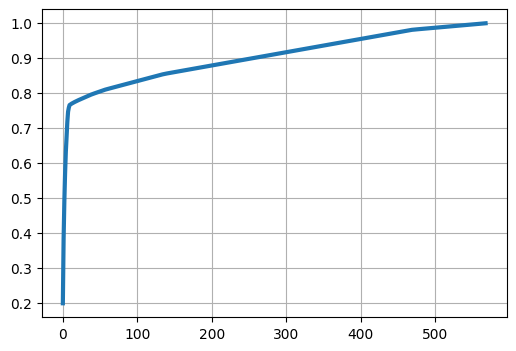

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum,linewidth=3)
plt.grid()
plt.xlabel = ('Dimensions')
plt.ylabel = ('Explained Varience')
plt.show()